### Important function for working with time series data

In [13]:
import datetime as datetime
import pandas as pd
import numpy as np

import requests

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [2]:
# bpi is bitcoin price index

coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = datetime.date(2017, 1 ,1)
end = datetime.date(2020, 7, 2)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'
print(url)

https://api.coindesk.com/v1/bpi/historical/close.json?start=2017-01-01&end=2020-07-02


### NOTE:

There was a problem with output of result.content. So intead of doing `data = pd.read_json(result.content).iloc[:-2,:1]`, I manually create a json file by going on the link and then read it using json libray.


This `.iloc[:-2,:1]` has been used as the last two lines are not of the date-time format

In [3]:
result = requests.get(url)
result.content

b'{"bpi":{"2024-04-09":69404.3757},"disclaimer":"This data was produced from the CoinDesk Bitcoin Price Index. BPI value data returned as USD.","time":{"updated":"Apr 10, 2024 00:03:00 UTC","updatedISO":"2024-04-10T00:03:00+00:00"}}'

In [7]:
data = pd.read_json('bpi_data.json').iloc[:-2,:1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)
data

,bpi
date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850
...,...
2020-06-28,9101.8501
2020-06-29,9188.0614
2020-06-30,9148.4449


<Axes: xlabel='date'>

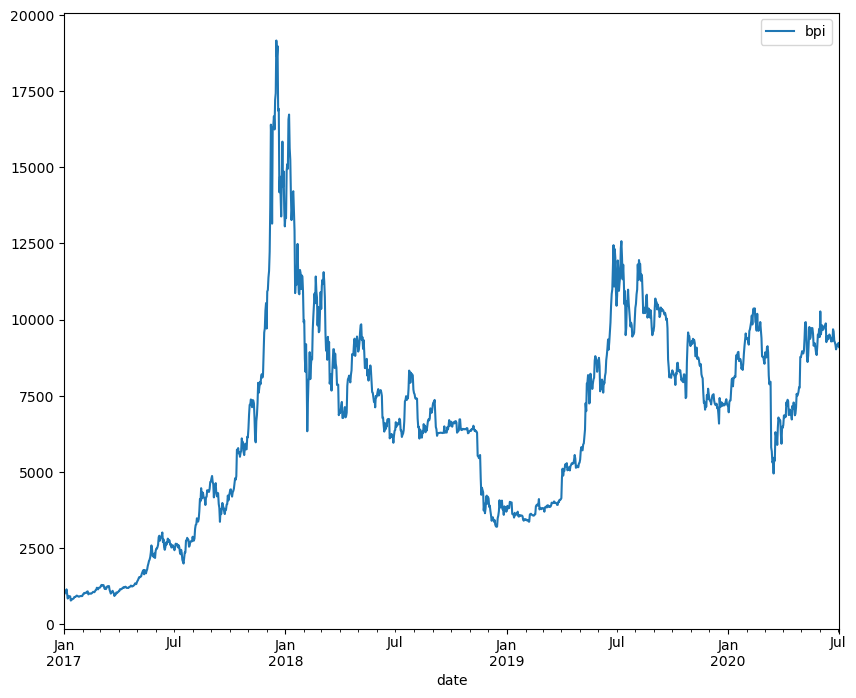

In [8]:
data.plot()

D Calendar day

B Business day

W Weekly

M Month

Q Quarter

A Year end

H Hours

T Minutes

S Seconds

In [11]:
data.resample('Q').mean()

,bpi
date,
2017-03-31,1032.854171
2017-06-30,1914.986338
2017-09-30,3481.034815
2017-12-31,9292.903147
2018-03-31,10473.551614
2018-06-30,7734.210633
2018-09-30,6782.595947
2018-12-31,5153.967428
2019-03-31,3745.025510


<Axes: xlabel='date'>

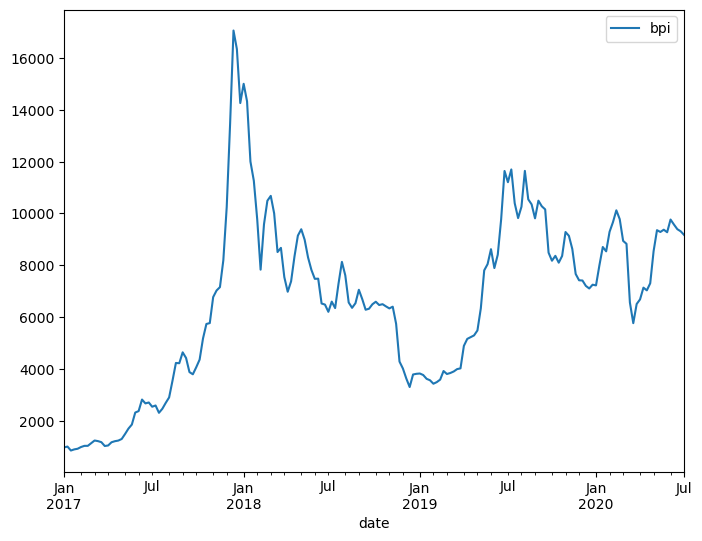

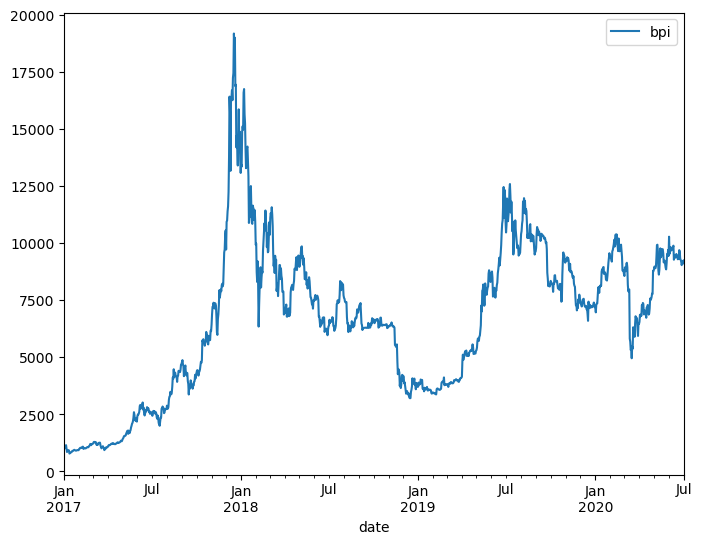

In [16]:
data.resample('W').mean().plot()
data.plot()

In [19]:
data[:5].diff(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,64.0088
2017-01-04,37.1262
2017-01-05,112.0512


In [20]:
data[:5]

,bpi
date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850


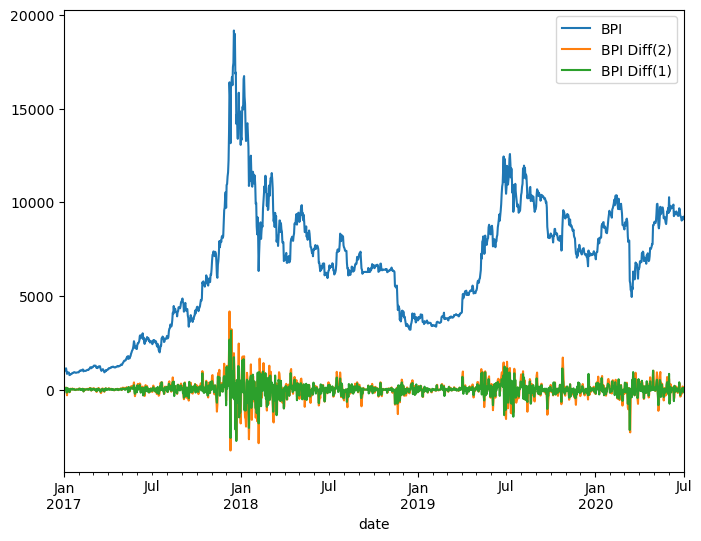

In [24]:
labels = ['BPI', 'BPI Diff(2)', 'BPI Diff(1)']

pd.concat([data['bpi'], data['bpi'].diff(2), data['bpi'].diff()], axis = 1).plot()

plt.legend(labels)
plt.show()

### NOTE:

Here, by using the diff() and diff(2), we have made our data stationary as it fluctuates around a fixed mean, zero in this case. Now we can use our model like ARIMA do forecast future BPI

One can also use `tshift` which is a time shift instead of value shift. But serves the same functionality as the shift function. BUT IT ONLY WORK FOR THE DATE_TIME COLUMN

In [25]:
data[:5]

,bpi
date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850


In [29]:
# DOESNT WORK. 
data[:5].tshift()

AttributeError: 'DataFrame' object has no attribute 'tshift'

In [31]:
data.resample('W').mean().rolling(window = 10).mean()

,bpi
date,
2017-01-01,NaN
2017-01-08,NaN
2017-01-15,NaN
2017-01-22,NaN
2017-01-29,NaN
...,...
2020-06-07,8372.069820
2020-06-14,8661.112527
2020-06-21,8886.883030


In [65]:
data['roll_win'] = data['bpi'].rolling(window = 50).mean()
data['roll_win_w_gaussian'] = data['bpi'].rolling(window = 10, win_type = 'gaussian').sum(std=0.4)
data['ewm_span50'] = data['bpi'].ewm(span = 50).mean()

data

,bpi,roll_win,roll_win_w_gaussian,ewm_span50
date,,,,
2017-01-01,964.3250,NaN,NaN,964.325000
2017-01-02,1009.9738,NaN,NaN,987.605888
2017-01-03,1028.3338,NaN,NaN,1001.728445
2017-01-04,1047.1000,NaN,NaN,1013.760796
2017-01-05,1140.3850,NaN,NaN,1041.151305
...,...,...,...,...
2020-06-28,9101.8501,9409.229540,8679.315083,9215.794913
2020-06-29,9188.0614,9417.257664,8515.712657,9214.707324
2020-06-30,9148.4449,9428.064058,8451.492701,9212.108797


<Axes: xlabel='date'>

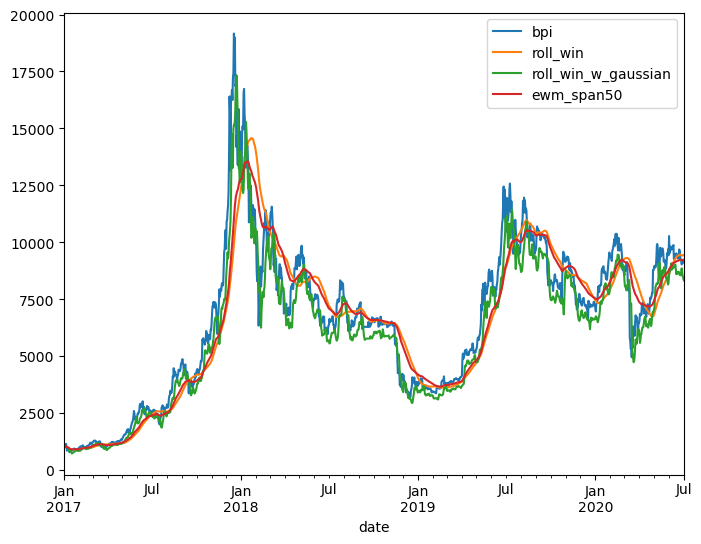

In [66]:
data.plot()

In [71]:
df = pd.DataFrame(data['bpi'])

In [72]:
df

,bpi
date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850
...,...
2020-06-28,9101.8501
2020-06-29,9188.0614
2020-06-30,9148.4449


In [73]:
df.groupby(data.index.dayofweek).mean()

,bpi
date,
0,6607.179104
1,6597.713860
2,6607.120999
3,6584.269647
4,6585.509408
5,6616.659732
6,6569.988007


In [76]:
df.groupby(data.index.year).mean()

,bpi
date,
2017,3951.843629
2018,7519.442859
2019,7362.522655
2020,8485.229087


### some functions that will be useful for future processing

- cumulative sum: cumsum()
- percentage change: pct_change(period)
- expanding :do the operation over expanding row.
    - expanding().sum() would give the result same as cumsum()
    - one can do the other operation with expanding like mean() 

In [80]:
df[:5]

,bpi
date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850


In [78]:
df[:5].cumsum()

,bpi
date,
2017-01-01,964.3250
2017-01-02,1974.2988
2017-01-03,3002.6326
2017-01-04,4049.7326
2017-01-05,5190.1176


In [84]:
df[:5].expanding().sum()

,bpi
date,
2017-01-01,964.3250
2017-01-02,1974.2988
2017-01-03,3002.6326
2017-01-04,4049.7326
2017-01-05,5190.1176


In [85]:
df[:5].expanding().mean()

,bpi
date,
2017-01-01,964.325000
2017-01-02,987.149400
2017-01-03,1000.877533
2017-01-04,1012.433150
2017-01-05,1038.023520


In [83]:
df[:5].pct_change(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,0.066377
2017-01-04,0.036760
2017-01-05,0.108964
